In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
conn=sqlite3.connect("factbook.db")

q="SELECT * FROM facts LIMIT5"
#use pd method read_sql_query to return query results to DataFrame
df=pd.read_sql_query(q,conn)
df.head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46


In [2]:
q2="SELECT MIN(population), MAX(population),\
    MIN(population_growth), MAX(population_growth)\
    FROM facts"
df2=pd.read_sql_query(q2,conn)
df2

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [3]:
q3a="SELECT name, MIN(population)\
    FROM facts"
df3a=pd.read_sql_query(q3a,conn)

q3b="SELECT name, MAX(population)\
    FROM facts"
df3b=pd.read_sql_query(q3b,conn)

print(df3a,"\n\n",df3b)

         name  MIN(population)
0  Antarctica                0 

     name  MAX(population)
0  World       7256490011


Observations for 3a and 3b - zero pop and 7.2B pop:
* Antarctica has no people
* World is not a country but 7.2B is correct

In [28]:
#get Problem 4 data and remove Nan

q4="SELECT population, population_growth, birth_rate, death_rate \
FROM facts"
q4=pd.read_sql_query(q4,conn)
#Remove any rows with a NaN
q4=q4.dropna() #This stripped out Antarctica, row 249
q4

,population,population_growth,birth_rate,death_rate
0,3.256434e+07,2.32,38.57,13.89
1,3.029278e+06,0.30,12.92,6.58
2,3.954217e+07,1.84,23.67,4.31
3,8.558000e+04,0.12,8.13,6.96
4,1.962535e+07,2.78,38.78,11.49
5,9.243600e+04,1.24,15.85,5.69
6,4.343189e+07,0.93,16.64,7.33
7,3.056382e+06,0.15,13.61,9.34
8,2.275101e+07,1.07,12.15,7.14
9,8.665550e+06,0.55,9.41,9.42


In [29]:
#NEED TO DISCARD q4 population OUTLIERS:
#Bitwise OR is "|".  Bitwise AND is "&&"

#Use bool_filter to exclude World outlier 7.2B 
bool_filter=(q4["population"]<7256490011)
q4=q4[bool_filter]

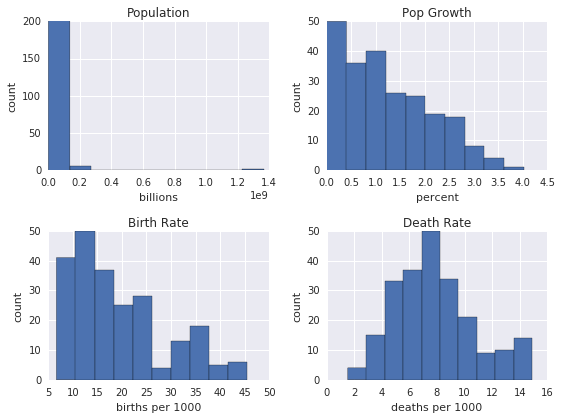

In [30]:
#setup 2 X 2  histogram structure
fig=plt.figure(figsize=(8,6))


ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.hist(q4["population"],bins=10)
ax1.set_title("Population")
#ax1.setxticks()
ax1.set_xlabel("billions")
ax1.set_ylabel("count")
ax1.set_ylim(0,200)

ax2.hist(q4["population_growth"],bins=10)
ax2.set_xlabel("percent")
ax2.set_ylabel("count")
ax2.set_title("Pop Growth")

ax3.hist(q4["birth_rate"],bins=10)
ax3.set_xlabel("births per 1000")
ax3.set_ylabel("count")
ax3.set_title("Birth Rate")

ax4.hist(q4["death_rate"],bins=10)
ax4.set_xlabel("deaths per 1000")
ax4.set_ylabel("count")
ax4.set_title("Death Rate")

plt.tight_layout()

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


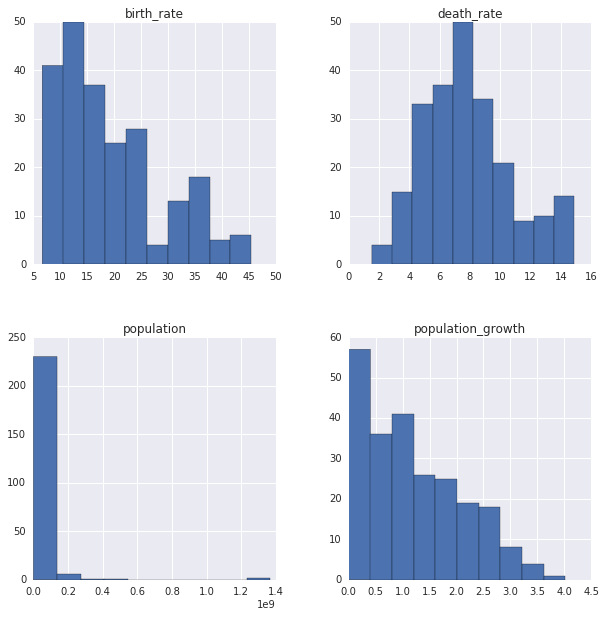

In [43]:
#DATAQUEST plotting solution

import seaborn as sns
figSNS = plt.figure(figsize=(10,10))
ax = figSNS.add_subplot(111)

q555 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''

pd.read_sql_query(q555, conn).hist(ax=ax)
plt.show()

In [62]:
#Investigate population density by name/country
q5="SELECT name, round(CAST(population as float) / CAST(area_land as float),1) AS density\
    FROM facts"
df5=pd.read_sql_query(q5,conn)
df5.sort_values(by='density',ascending=False).head(20)


,name,density
204,Macau,21169.0
116,Monaco,15267.5
155,Singapore,8259.8
203,Hong Kong,6655.3
250,Gaza Strip,5191.8
232,Gibraltar,4876.3
12,Bahrain,1771.9
107,Maldives,1319.6
109,Malta,1310.0
226,Bermuda,1299.9


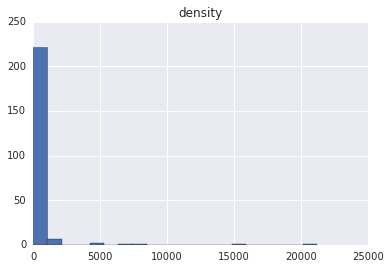

In [60]:
df5.hist(bins=20)
plt.show()

In [66]:
q5="SELECT name, round(CAST(area_water as float) / CAST(area_land as float),1) AS pctWater\
    FROM facts"
df5=pd.read_sql_query(q5,conn)
df5.sort_values(by='pctWater',ascending=False).head(10)

,name,pctWater
227,British Indian Ocean Territory,905.7
246,Virgin Islands,4.5
245,Puerto Rico,0.6
11,"Bahamas, The",0.4
105,Malawi,0.3
70,Guinea-Bissau,0.3
98,Liberia,0.2
55,Eritrea,0.2
181,Uganda,0.2
124,Netherlands,0.2
